<a href="https://colab.research.google.com/github/MagicMoleMM/DistFitter/blob/main/04_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Файлы для обучения/3.10_non_linear.csv', sep=',')
data = data[(data.x_train > 1.0) & (data.x_train < 5.0)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


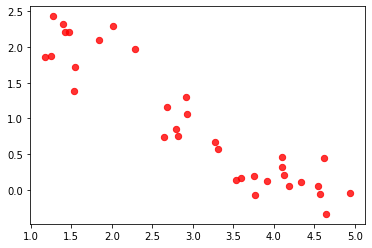

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data.x_train, data.y_train, 40, 'r', 'o', alpha=0.8, label='data')

In [15]:
from sklearn.linear_model import SGDRegressor
from scipy.spatial import distance

def gradient(X, y, w) -> np.array:
  n = X.shape[0]           #количество примеров в обучающей выборке
  y_hat = X.dot(w.T)       #прогноз
  error = y-y_hat          #ошибка
  grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n #расчет градиента
  return grad, error

def eval_w_next(X, y, eta, w_current):
  grad, error = gradient(X, y, w_current)    #вычисляем градиент
  w_next = w_current - eta * grad           #шаг градиентного спуска
  weight_evolution = distance.euclidean(w_current, w_next)   #условие сходимости
  return (w_next, weight_evolution, grad)

def gradient_descent(X, y, eta=0.01, epsilon=0.001):
  m = X.shape[1] #число фичей = размерность градиента
  w = np.random.random(m).reshape(1,-1)
  w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
  step = 0
  while weight_evolution > epsilon:
    w = w_next
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step += 1
    if step % 100 == 0:
      print("step %s, |w-w_next|=%0.5f, grad=%s" % (step, weight_evolution, grad))
  return w




In [18]:
X = data.x_train.values.reshape(-1,1)
n = X.shape[0]
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])

w = gradient_descent(X, data.y_train.values.reshape(-1,1), eta=0.008)

step 100, |w-w_next|=0.00425, grad=[-0.51011252  0.14736138]
step 200, |w-w_next|=0.00350, grad=[-0.41978476  0.12126747]
step 300, |w-w_next|=0.00288, grad=[-0.34545171  0.09979413]
step 400, |w-w_next|=0.00237, grad=[-0.28428113  0.08212316]
step 500, |w-w_next|=0.00195, grad=[-0.23394228  0.06758127]
step 600, |w-w_next|=0.00160, grad=[-0.19251714  0.05561437]
step 700, |w-w_next|=0.00132, grad=[-0.15842732  0.0457665 ]
step 800, |w-w_next|=0.00109, grad=[-0.13037393  0.03766243]
